First, a simple model using a linear regression will be developed with the independent variable being the distance from downtown and the dependent variable being the price of the apartment. We will use Python in order to create a linear regression with manual calculations first.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

desiredCols = ["monthly_rent_usd", "driving_distance_to_downtown_miles"]

df = pd.read_csv('../data/nashville_studio_apartments_dummy.csv', usecols=desiredCols)

monthlyRent = np.array(df.monthly_rent_usd)
drivingDistance = np.array(df.driving_distance_to_downtown_miles)

Now that we have the dependent and independent variables, we can now calculate the regression line using least squares. First, we can define some helper functions to help with calculating the regression line.

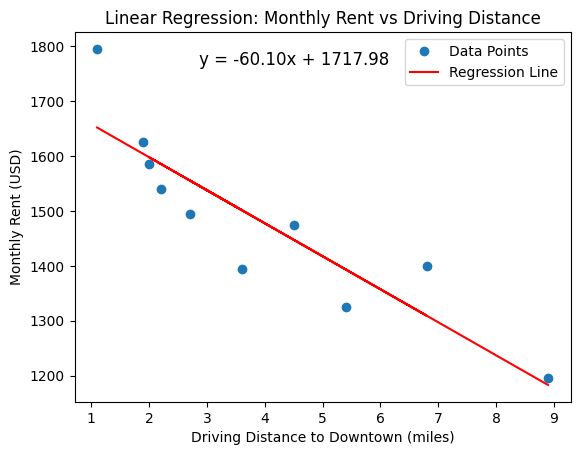

In [73]:
def slopeCalculation(x,y):
    numerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    denominator = np.sum((x-np.mean(x))**2)
    slope = numerator / denominator
    return slope
slope = slopeCalculation(drivingDistance, monthlyRent)
intercept = np.mean(monthlyRent) - slope * np.mean(drivingDistance)

def equationResult(distance):
    return slope*distance + intercept

equation = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(drivingDistance, monthlyRent, 'o', label='Data Points')
plt.plot(drivingDistance, slope * drivingDistance + intercept, 'r', label='Regression Line')
plt.xlabel('Driving Distance to Downtown (miles)')
plt.ylabel('Monthly Rent (USD)')
plt.title('Linear Regression: Monthly Rent vs Driving Distance')
plt.text(
    0.25, 0.95, equation,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)
plt.legend()

With our calculations, we are able to determine that there's a negative correlation with distance to downtown and monthly rent. 
We can now see how good of a fit this line is to the data by first calculating the coefficent of determination.

In [74]:
def TSS(y):
    return np.sum((y - np.mean(y))**2)

def ESS(y, x):
    return np.sum((y - equationResult(x))**2)

def coefficentOfDetermination(TSS, ESS):
    return (TSS - ESS) / TSS

currTSS = TSS(monthlyRent)
currESS = ESS(monthlyRent, drivingDistance)
RValue = coefficentOfDetermination(currTSS, currESS)
print(f"Coefficent of determination calculated to be {RValue}")



Coefficent of determination calculated to be 0.7949908763234588


Our coefficent of determination (R^2) is 0.795, which demonstrates that our trendline is accurate for our data. To do a further analysis we'll also create a residual plot to see if a linear regression is a good approach to our data.

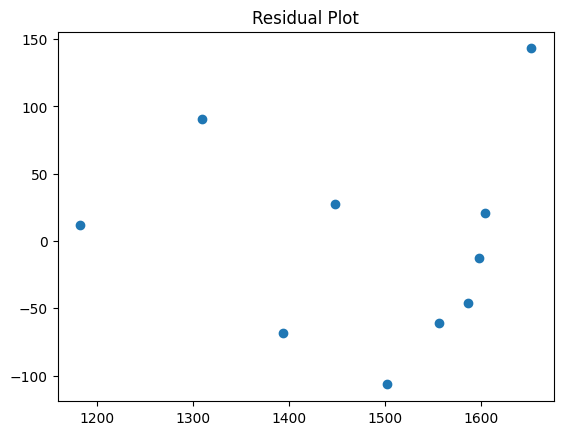

In [76]:
def getResidual(x,y):
    residuals = []
    for i in range(len(x)):
        fittedVal = equationResult(x[i])
        residuals.append(y[i] - fittedVal)
    return np.array(residuals)

def residualPlot(x,y):
    residuals = getResidual(x, y)
    fittedValues = []
    for i in x:
        fittedValues.append(equationResult(i))

    plt.plot(fittedValues, residuals, marker = "o", linestyle = "")
    plt.title("Residual Plot")

residualPlot(drivingDistance, monthlyRent)



Now that we created the residual plot for our dummy data, we can see that the points are randomly distributed and that it's homosedastic, meaning that the points are roughly constant across different fitted values.

To do one further test, we can generate a Q-Q plot to ensure that 